The input data spreadsheets:

"training_data.csv":
There are 6950 training subjects. We are interested in predicting INBGR from the 62 IQMs. We are going to test random forest regression.

training_data.csv was generated from step1: Invicro_generate_training_dataset.ipynb

In [111]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

In [112]:
csv_fn='./training_data.csv'
training_df = pd.read_csv(csv_fn)
training_df.shape

(6950, 76)

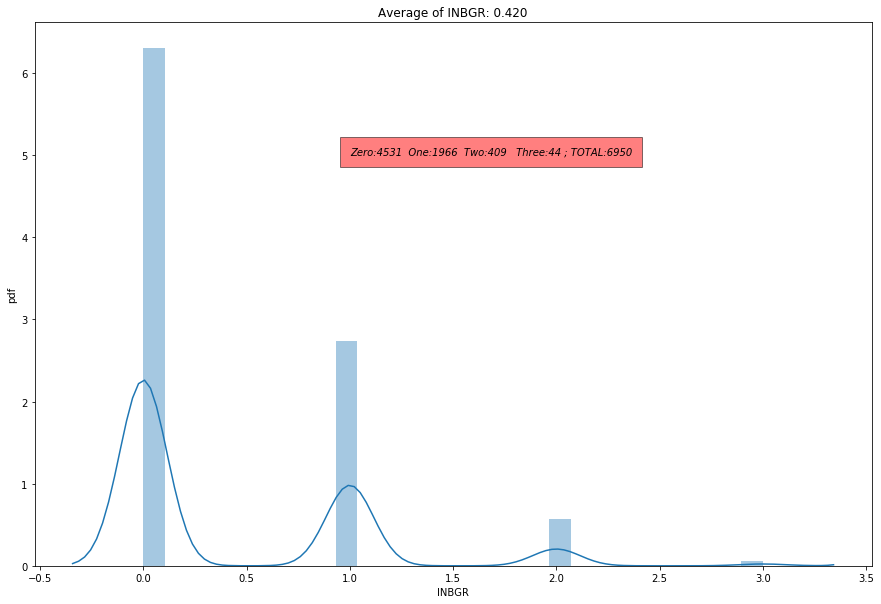

In [113]:
# check the disribution of INBGR
inbgr_mean = np.mean(training_df['INBGR'].values)
zeros = (training_df['INBGR'] == 0).astype(int).sum(axis=0)
ones = (training_df['INBGR'] == 1).astype(int).sum(axis=0)
twos = (training_df['INBGR'] == 2).astype(int).sum(axis=0)
threes = (training_df['INBGR'] == 3).astype(int).sum(axis=0)
total = zeros + ones + twos + threes

plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title('Average of INBGR: {:1.3f}'.format(inbgr_mean))
plt.text(1,5,"Zero:{}  One:{}  Two:{}   Three:{} ; TOTAL:{}".format(zeros,ones,twos,threes,total), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

## plot kde
plt.ylabel('pdf')
seabornInstance.distplot(training_df['INBGR'])

## plot histogram
#plt.ylabel('histogram')
#seabornInstance.distplot(training_df['INBGR'], hist=True, kde=False)

# Extract a subset of data with uniform distribution

In [114]:
df0 = training_df[training_df['INBGR']==0]
df1 = training_df[training_df['INBGR']==1]
df2 = training_df[training_df['INBGR']==2]
df3 = training_df[training_df['INBGR']==3]
#
n=df3.shape[0]
df0sample = df0.sample(n)
df1sample = df1.sample(n)
df2sample = df2.sample(n)

training_df_uni = pd.concat([df0sample, df1sample, df2sample, df3])
training_df_uni.shape

(176, 76)

In [115]:
training_df_uni.describe()

,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,fwhm_z,icvs_csf,icvs_gm,...,INFLOW,OUTFLOW,INOTHER,OUTOTHER,WRAP,HEADCOVER,INHOMOGEN,IPMOTION,MARKER,PASS
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,176.000000
mean,0.513112,2.565567,0.619263,676.713451,3.284136,3.049095,3.560878,3.242433,0.247735,0.375548,...,1.301136,1.534091,0.107955,0.130682,0.414773,-0.022727,0.965909,-4.0,0.284091,0.687500
std,0.087037,0.452868,0.040512,3552.720376,0.522591,0.266710,0.729615,0.636602,0.025286,0.024187,...,1.149011,1.013609,0.420536,0.523692,0.559191,0.149458,0.211058,0.0,0.700186,0.464835
min,0.347812,1.071164,0.512326,5.847160,2.291860,2.391556,2.298952,2.121056,0.202592,0.310859,...,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-4.0,0.000000,0.000000
25%,0.460411,2.359443,0.595031,39.360237,2.787245,2.851912,2.901734,2.641586,0.230271,0.358193,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.0,0.000000,0.000000
50%,0.497904,2.599567,0.619052,75.322590,3.374255,3.038586,3.716628,3.326421,0.244080,0.372260,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.0,0.000000,1.000000
75%,0.544850,2.812247,0.643867,128.777866,3.658801,3.208932,4.080273,3.714825,0.263874,0.389083,...,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-4.0,0.000000,1.000000
max,0.816544,3.943875,0.750093,34102.753906,6.040375,4.048335,7.947968,6.124821,0.399365,0.487902,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,2.000000,-4.0,2.000000,1.000000


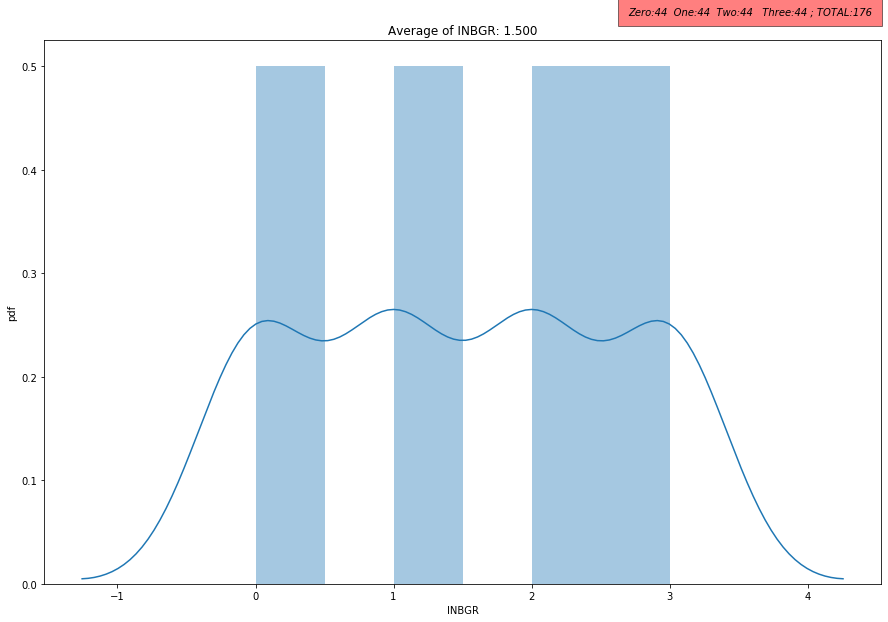

In [116]:
# check the disribution of INBGR
inbgr_mean = np.mean(training_df_uni['INBGR'].values)
zeros = (training_df_uni['INBGR'] == 0).astype(int).sum(axis=0)
ones = (training_df_uni['INBGR'] == 1).astype(int).sum(axis=0)
twos = (training_df_uni['INBGR'] == 2).astype(int).sum(axis=0)
threes = (training_df_uni['INBGR'] == 3).astype(int).sum(axis=0)
total = zeros + ones + twos + threes

plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title('Average of INBGR: {:1.3f}'.format(inbgr_mean))
plt.text(2.7,0.55,"Zero:{}  One:{}  Two:{}   Three:{} ; TOTAL:{}".format(zeros,ones,twos,threes,total), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

## plot kde
plt.ylabel('pdf')
seabornInstance.distplot(training_df_uni['INBGR'])

## plot histogram
#plt.ylabel('histogram')
#seabornInstance.distplot(training_df_uniform['INBGR'], hist=True, kde=False)

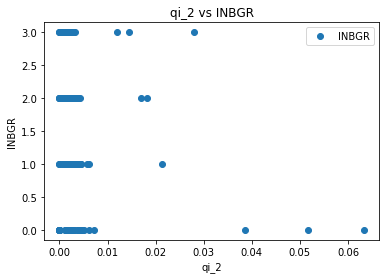

In [117]:
# Check how each mriqc measure is related to INBGR or eachother
xlabel = 'qi_2'
ylabel = 'INBGR'
title = xlabel + ' vs ' + ylabel
training_df_uni.plot(x=xlabel, y=ylabel, style='o')  
plt.title(title)
plt.xlabel(xlabel)  
plt.ylabel(ylabel)  
plt.show()

# Set test/training data

In [118]:
headerlist = training_df_uni.columns.values.tolist()
# print headers to find the index of the columns of interest
print ([list((i, headerlist[i])) for i in range(len(headerlist))])

[[0, 'Series'], [1, 'SeriesDescription'], [2, 'cjv'], [3, 'cnr'], [4, 'efc'], [5, 'fber'], [6, 'fwhm_avg'], [7, 'fwhm_x'], [8, 'fwhm_y'], [9, 'fwhm_z'], [10, 'icvs_csf'], [11, 'icvs_gm'], [12, 'icvs_wm'], [13, 'inu_med'], [14, 'inu_range'], [15, 'qi_1'], [16, 'qi_2'], [17, 'rpve_csf'], [18, 'rpve_gm'], [19, 'rpve_wm'], [20, 'snr_csf'], [21, 'snr_gm'], [22, 'snr_total'], [23, 'snr_wm'], [24, 'snrd_csf'], [25, 'snrd_gm'], [26, 'snrd_total'], [27, 'snrd_wm'], [28, 'summary_bg_k'], [29, 'summary_bg_mad'], [30, 'summary_bg_mean'], [31, 'summary_bg_median'], [32, 'summary_bg_n'], [33, 'summary_bg_p05'], [34, 'summary_bg_p95'], [35, 'summary_bg_stdv'], [36, 'summary_csf_k'], [37, 'summary_csf_mad'], [38, 'summary_csf_mean'], [39, 'summary_csf_median'], [40, 'summary_csf_n'], [41, 'summary_csf_p05'], [42, 'summary_csf_p95'], [43, 'summary_csf_stdv'], [44, 'summary_gm_k'], [45, 'summary_gm_mad'], [46, 'summary_gm_mean'], [47, 'summary_gm_median'], [48, 'summary_gm_n'], [49, 'summary_gm_p05'], [

# Train on uniformly distributed dataset
# Test on the whole dataset

In [119]:
predictors = headerlist[2:64]

X_train = training_df_uni[predictors].values
y_train = training_df_uni['INBGR'].values

X_test = training_df[predictors].values
y_test = training_df['INBGR'].values

In [120]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
threes = (y_train == 3).astype(int).sum(axis=0)
print(threes)

(176, 62)
(6950, 62)
(176,)
(6950,)
44


# Multivariate Linear Regression

In [121]:
#training the algorithm
lm_model = LinearRegression()  
lm_model.fit(X_train, y_train)

y_pred_lm = lm_model.predict(X_test)
# Comparison between Actual and Predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lm})
df

,Actual,Predicted
0,0.0,0.746587
1,0.0,1.126812
2,0.0,0.993943
3,0.0,0.936738
4,0.0,1.891630
...,...,...
6945,2.0,1.003014
6946,1.0,4.098326
6947,1.0,3.190312
6948,0.0,0.498657


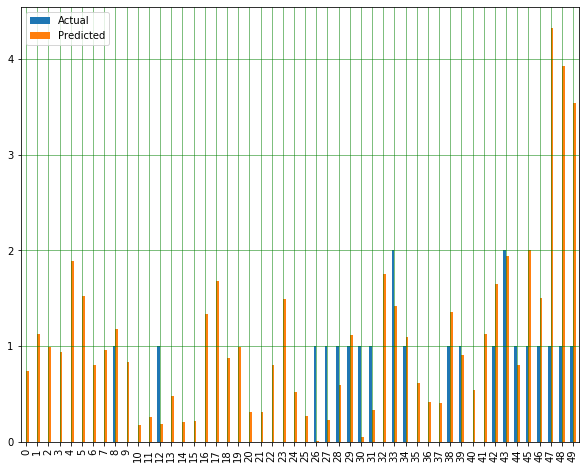

In [122]:
# plot some actual vs predicted samples
df1 = df.head(50)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [123]:
# Find linear regression coefficient for each predictor
coeff_df = pd.DataFrame(lm_model.coef_, training_df[predictors].columns, columns=['Coefficient'])

#pd.set_option('display.max_rows', None)
#display(coeff_df)

# sort values based on coef
#coeff_df.sort_values(by=['Coefficient'])

# sort values based on absolute value of coef
coeff_df_sorted = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)
coeff_df_sorted

,Coefficient
qi_1,-6.160168e+01
icvs_csf,2.045689e+01
icvs_gm,-1.623882e+01
tpm_overlap_csf,1.453187e+01
qi_2,1.108487e+01
...,...
summary_csf_n,-2.389751e-05
fber,-1.746847e-05
summary_wm_n,-1.032285e-05
summary_gm_n,-3.241596e-07


No handles with labels found to put in legend.


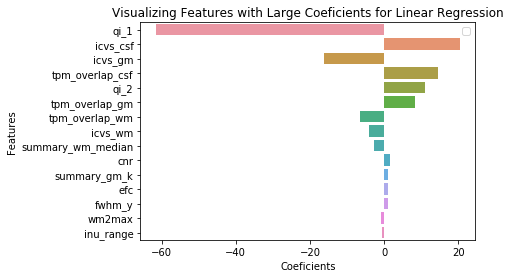

In [124]:
coeffs = pd.Series(coeff_df_sorted['Coefficient'],index=coeff_df_sorted.index)
coeffs1 = coeffs.head(15)
# Creating a bar plot
seabornInstance.barplot(x=coeffs1, y=coeffs1.index)
# Add labels to your graph
plt.xlabel('Coeficients')
plt.ylabel('Features')
plt.title("Visualizing Features with Large Coeficients for Linear Regression")
plt.legend()
plt.show()

In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lm)))

Mean Absolute Error: 0.7464594186805913
Mean Squared Error: 1.3208690626634256
Root Mean Squared Error: 1.1492906780546972


In [126]:
r_squared_lm = metrics.r2_score(y_test, y_pred_lm)
print('R-squared:', r_squared_lm)  

R-squared: -2.3086725259404135


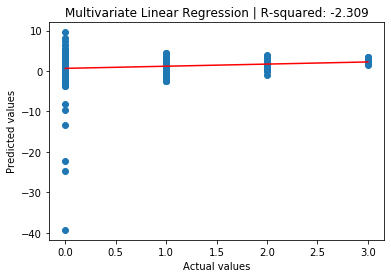

In [127]:
plt.scatter(y_test, y_pred_lm)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Multivariate Linear Regression | R-squared: {:1.3f}'.format(r_squared_lm))

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred_lm, 1))(np.unique(y_test)), color='red')

plt.show()

# GLM

# Modeled with poison regression

In [128]:
import statsmodels.api as sm
glm_model = sm.GLM(y_train, X_train, family=sm.families.Poisson())
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  176
Model:                            GLM   Df Residuals:                      117
Model Family:                 Poisson   Df Model:                           58
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -201.77
Date:                Tue, 21 Jul 2020   Deviance:                       68.902
Time:                        16:50:20   Pearson chi2:                     56.1
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6568      6.852     -0.242      0.8

In [129]:
y_pred_glm = glm_results.predict(X_test)
# Comparison between Actual and Predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_glm})
df

,Actual,Predicted
0,0.0,0.559462
1,0.0,0.834016
2,0.0,0.686092
3,0.0,0.589749
4,0.0,1.730365
...,...,...
6945,2.0,1.489836
6946,1.0,13.507602
6947,1.0,8.939749
6948,0.0,0.424772


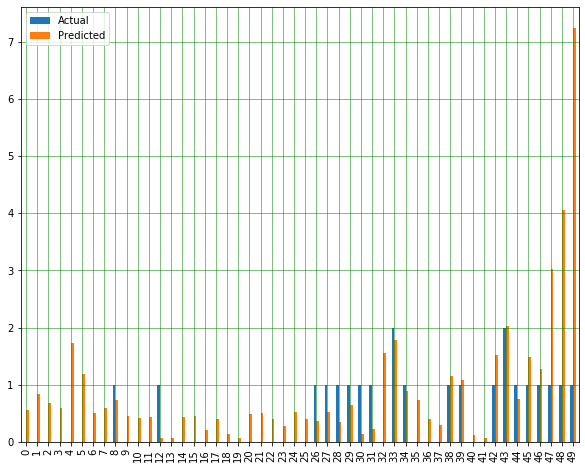

In [130]:
# plot some actual vs predicted samples
df1 = df.head(50)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [131]:
# Find linear regression coefficient for each predictor
coeff_df = pd.DataFrame(glm_results.params, training_df[predictors].columns, columns=['Coefficient'])

#pd.set_option('display.max_rows', None)
#display(coeff_df)

# sort values based on coef
#coeff_df.sort_values(by=['Coefficient'])

# sort values based on absolute value of coef
coeff_df_sorted = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)
coeff_df_sorted

,Coefficient
icvs_csf,2.348782e+03
icvs_wm,2.327487e+03
icvs_gm,2.316875e+03
qi_1,-7.936480e+01
tpm_overlap_csf,1.203552e+01
...,...
fber,-2.502717e-04
summary_csf_n,-1.341108e-05
summary_wm_n,-8.398190e-06
summary_gm_n,6.953047e-06


No handles with labels found to put in legend.


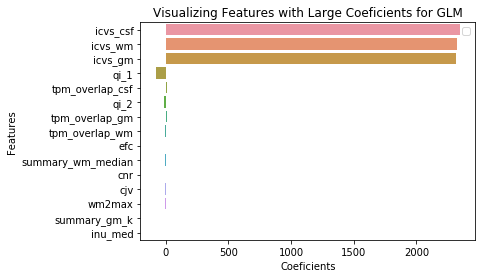

In [132]:
coeffs = pd.Series(coeff_df_sorted['Coefficient'],index=coeff_df_sorted.index)
coeffs1 = coeffs.head(15)
# Creating a bar plot
seabornInstance.barplot(x=coeffs1, y=coeffs1.index)
# Add labels to your graph
plt.xlabel('Coeficients')
plt.ylabel('Features')
plt.title("Visualizing Features with Large Coeficients for GLM")
plt.legend()
plt.show()

In [133]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_glm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_glm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_glm)))

Mean Absolute Error: 0.9265085877493
Mean Squared Error: 82.37743267716125
Root Mean Squared Error: 9.076201445382383


In [134]:
r_squared_glm = metrics.r2_score(y_test, y_pred_glm)
print('R-squared:', r_squared_glm)

R-squared: -205.34895309519504


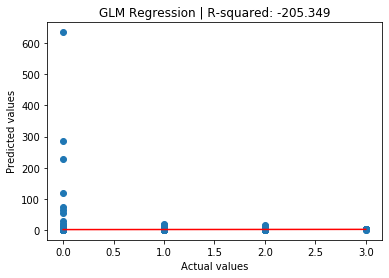

In [135]:
plt.scatter(y_test, y_pred_glm)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('GLM Regression | R-squared: {:1.3f}'.format(r_squared_glm))

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred_glm, 1))(np.unique(y_test)), color='red')

plt.show()

# Random Forest Regression With Default Parameters

In [136]:
# Set the regressor
# setting the random_state makes the results reproducible
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [137]:
y_pred_rf = rfr.predict(X_test)
# Comparison between Actual and Predicted value
df = pd.DataFrame({'Actual': y_test, 'RF Predicted': y_pred_rf})
df

,Actual,RF Predicted
0,0.0,0.43
1,0.0,0.60
2,0.0,0.81
3,0.0,0.62
4,0.0,0.89
...,...,...
6945,2.0,1.76
6946,1.0,0.99
6947,1.0,0.77
6948,0.0,0.36


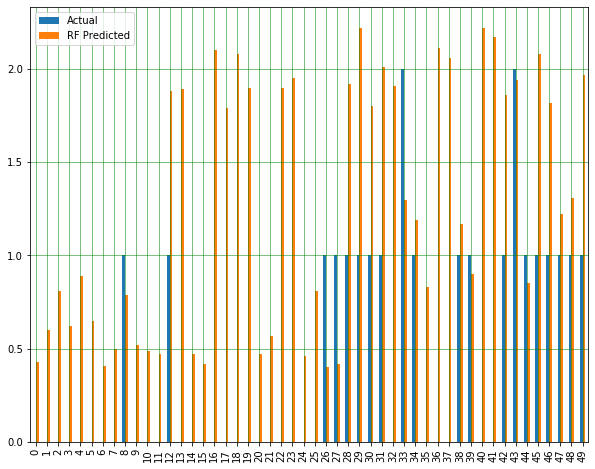

In [138]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [139]:
feature_imp = pd.Series(rfr.feature_importances_,index=training_df[predictors].columns).sort_values(ascending=False)
feature_imp

summary_wm_p95        0.413333
summary_wm_mean       0.050345
icvs_csf              0.048368
summary_csf_p95       0.048333
summary_csf_median    0.039824
                        ...   
snrd_gm               0.002477
cjv                   0.002294
snrd_wm               0.002158
summary_bg_mad        0.001664
snrd_total            0.001320
Length: 62, dtype: float64

No handles with labels found to put in legend.


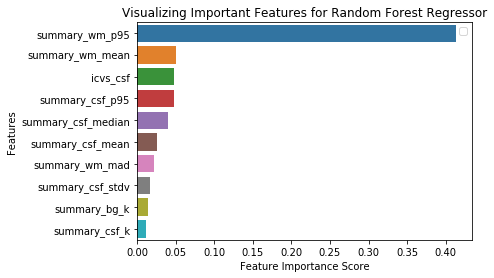

In [140]:
feature_imp1 = feature_imp.head(10)
# Creating a bar plot
seabornInstance.barplot(x=feature_imp1, y=feature_imp1.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Random Forest Regressor")
plt.legend()
plt.show()

In [141]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error: 0.6713064748201438
Mean Squared Error: 0.6529421007194244
Root Mean Squared Error: 0.8080483282078024


In [142]:
# the score function returns r-squared
rfr.score(X_test,y_test)

-0.6355683169109609

In [143]:
# r-squared could be calculated by metrics as well
r_squared_rf = metrics.r2_score(y_test, y_pred_rf)
print('R-squared:', r_squared_rf)  

R-squared: -0.6355683169109609


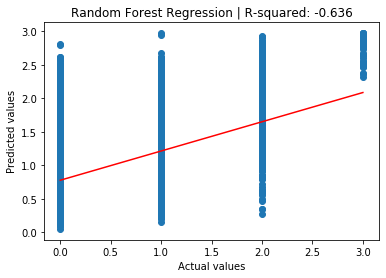

In [144]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regression | R-squared: {:1.3f}'.format(r_squared_rf))

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred_rf, 1))(np.unique(y_test)), color='red')

plt.show()

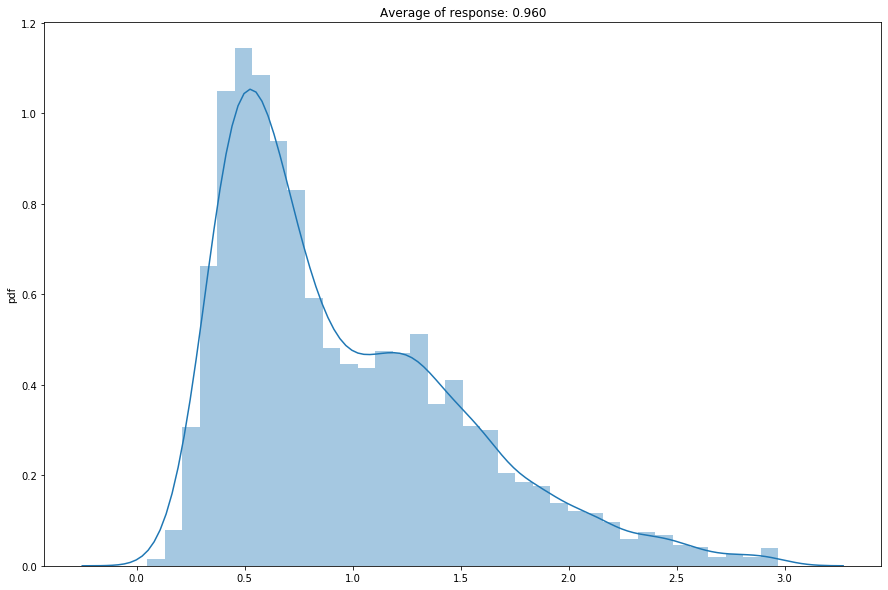

In [145]:
y_pred_mean = np.mean(y_pred_rf)
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title('Average of response: {:1.3f}'.format(y_pred_mean))

## plot kde
plt.ylabel('pdf')
seabornInstance.distplot(y_pred_rf)

## plot histogram
#plt.ylabel('histogram')
#seabornInstance.distplot(y_pred_rf, hist=True, kde=False)